Best score: 10.0
Last score: 10.0
Epsilon: 10.0
Best score: 200.0
Last score: 200.0
Epsilon: 0.01996007984031936
Best score: 200.0


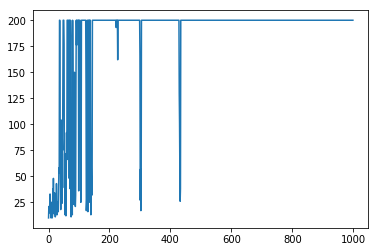

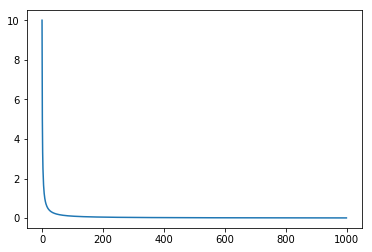

In [92]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
%matplotlib inline

#space: pos_x, v_x, angle, angular velocity
buckets = (10, 5) 
env = gym.make('CartPole-v0')
Q = np.zeros(buckets + (env.action_space.n,))
alpha = 0.5
gamma = 1
scores = deque(maxlen=2000)
epsilons = []

def discretize(state):
    result = np.zeros(len(buckets), int)
    min_value = [env.observation_space.low[2], -np.radians(50)]
    max_value = [env.observation_space.high[2], np.radians(50)]
    for i in range(2):
        value = max(min_value[i], min(max_value[i], state[i + 2]))
        result[i] = int(round(abs(value - min_value[i]) / abs(max_value[i] - min_value[i]) * (buckets[i] - 1)))
    return tuple(result)

def execute(num_episodes = 100):
    for i in range(num_episodes):
        epsilon = max(min_epsilon, min(1, 1/np.log(i + 1.1)))
        epsilon = 0.2 * (0.5 / ((i + 1)/100.0))
        run_episode(i, epsilon)

def choose_action(state, epsilon):
    if np.random.random() <= epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q[state])

def update_Q(old_state, next_state, action, reward):
    Q[old_state][action] += (alpha * (reward + (gamma * np.amax(Q[next_state])) - Q[old_state][action]))

def run_episode(i_episode, epsilon):
    state = discretize(env.reset())
    done = False
    t = 0
    score = 0
    while not done :
        t+=1
        action = choose_action(state, epsilon)
        observation, reward, done, _ = env.step(action)
        score += reward
        next_state = discretize(observation)

        if done:
            scores.append(score)
            epsilons.append(epsilon)
            break        

        update_Q(state, next_state, action, reward)

        state = next_state
    if i_episode % 500 == 0:
        print("Best score:", np.max(scores))
        print("Last score:", score)
        print("Epsilon:", epsilon)

execute(1000)
print("Best score:", np.max(scores))
plt.plot(scores)
plt.show()
plt.plot(epsilons)
